# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Reading CSV

In [2]:
dataset = pd.read_csv('../output2.csv')[['win', 'time', 'score']]

In [3]:
dataset = dataset[dataset.time <= 0.5]

In [4]:
dataset, test_data = dataset.iloc[:-5], dataset.iloc[-5:]

In [5]:
X_col_names = ['win', 'time']
X = dataset[X_col_names]
Y = dataset.score

In [6]:
win_dataset = dataset[dataset.win == True]
lose_dataset = dataset[dataset.win == False]

In [7]:
pca = PCA(n_components=2, random_state=42)

In [8]:
fit_x, fit_y = pca.fit_transform(X, Y).T

# Linear Regression

In [9]:
fit_win_x, _ = pca.fit_transform(win_dataset[X_col_names]).T
fit_lose_x, _ = pca.fit_transform(lose_dataset[X_col_names]).T

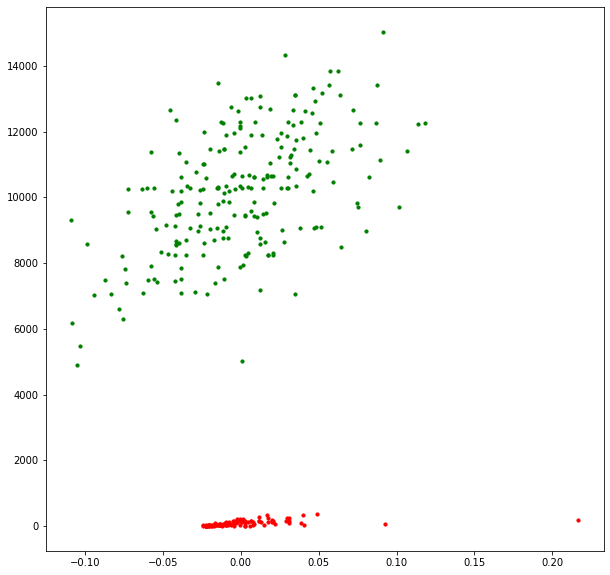

In [10]:
fig = plt.figure(figsize=(10, 10))
m1 = plt.scatter(fit_win_x, win_dataset.score, s=10, color="green")
m2 = plt.scatter(fit_lose_x, lose_dataset.score, s=10, color="red")

In [11]:
model = linear_model.LinearRegression()

In [12]:
model.fit(X, Y)

LinearRegression()

In [13]:
y_pred_line_win = model.predict(win_dataset[X_col_names])
y_pred_line_lose = model.predict(lose_dataset[X_col_names])

In [14]:
fit_pred_win_X, fit_pred_win_Y = pca.fit_transform(win_dataset[X_col_names], pd.DataFrame(y_pred_line_win)[0]).T
fit_pred_lose_X, fit_pred_lose_Y = pca.fit_transform(lose_dataset[X_col_names], pd.DataFrame(y_pred_line_lose)[0]).T

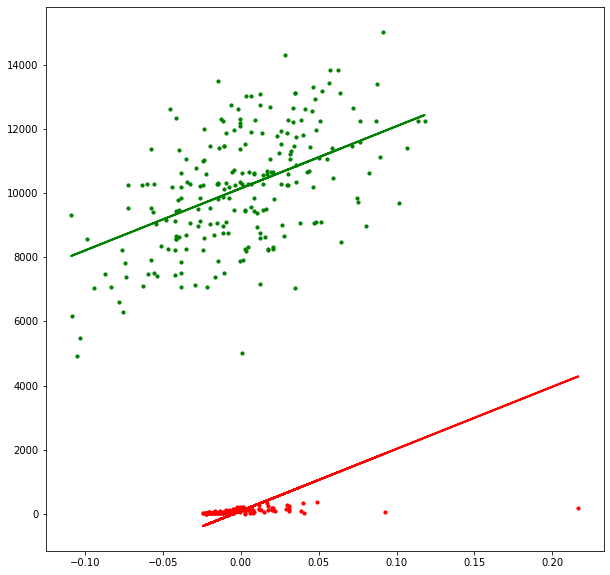

In [15]:
fig = plt.figure(figsize=(10, 10))
m1 = plt.scatter(fit_win_x, win_dataset.score, s=10, color="green")
m2 = plt.scatter(fit_lose_x, lose_dataset.score, s=10, color="red")
plt.plot(fit_pred_win_X, y_pred_line_win, color="green", linewidth=2, label="Prediction")
plt.plot(fit_pred_lose_X, y_pred_line_lose, color="red", linewidth=2, label="Prediction")

In [16]:
win_dataset

,win,time,score
1,True,0.446002,8480
2,True,0.354002,9500
4,True,0.483000,9700
5,True,0.419510,9080
7,True,0.371000,7500
...,...,...,...
334,True,0.367001,13490
335,True,0.417019,11750
336,True,0.402028,10650
337,True,0.356998,8240


In [17]:
def get_regression(ds):
    X = ds.time.array.reshape(-1, 1)
    Y = ds.score
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
    l_model = linear_model.LinearRegression()
    l_model.fit(X_train, y_train)
    y_pred_line = l_model.predict(X)
    fig = plt.figure(figsize=(20, 10))
    m1 = plt.scatter(X, Y, s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    return l_model

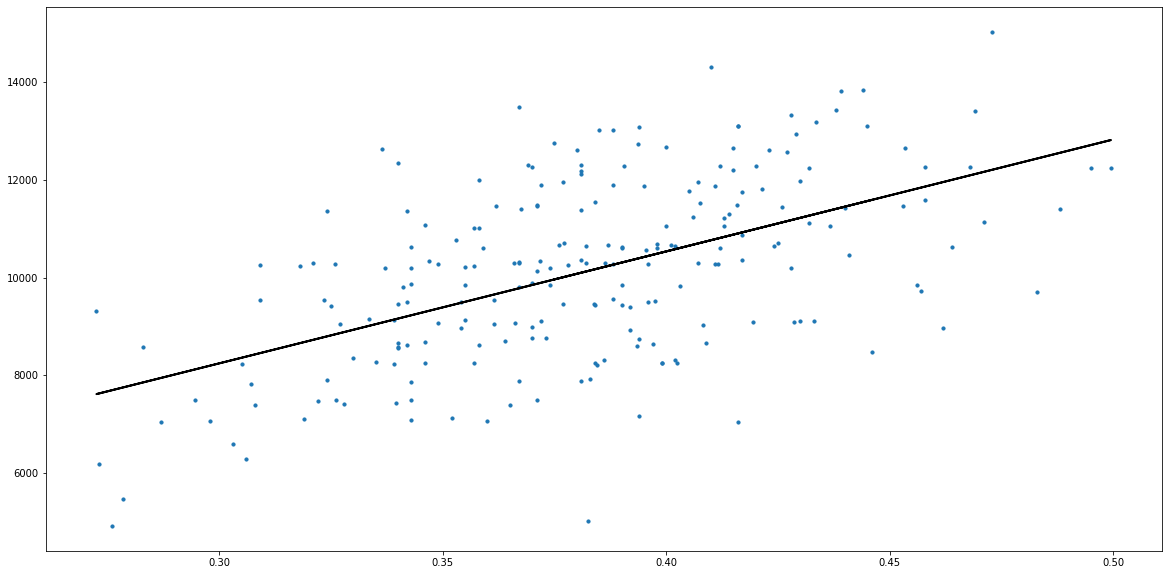

In [18]:
win_model = get_regression(win_dataset)

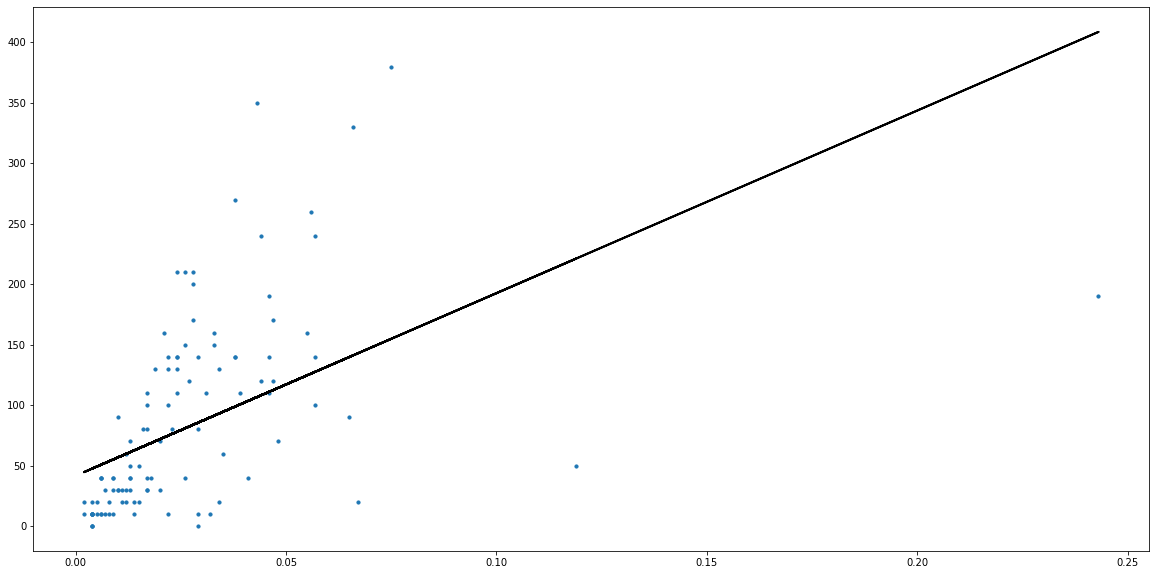

In [19]:
lose_model = get_regression(lose_dataset)

In [20]:
comparison_table = pd.DataFrame(columns=['win', 'time', 'score', 'predicted_score'])

In [21]:
comparison_table.win = test_data.win
comparison_table.time = test_data.time
comparison_table.score = test_data.score
comparison_table.predicted_score = comparison_table.apply(lambda row: model.predict(pd.DataFrame(columns=X_col_names).append(row[X_col_names]))[0], axis=1)

In [22]:
comparison_table

,win,time,score,predicted_score
340,True,0.440471,12580,11294.242631
341,True,0.347000,7410,9482.768755
342,False,0.013998,60,-152.787999
343,True,0.490000,10360,12254.100242
344,False,0.031998,130,196.060009


In [24]:
better_comparison_table = comparison_table.copy()
better_comparison_table.predicted_score = better_comparison_table.apply(lambda row: (win_model if row.win == True else lose_model).predict([[row.time]])[0], axis=1)

In [25]:
better_comparison_table

,win,time,score,predicted_score
340,True,0.440471,12580,11462.796885
341,True,0.347000,7410,9320.351234
342,False,0.013998,60,62.706139
343,True,0.490000,10360,12598.028694
344,False,0.031998,130,89.894844
